In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import torch
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
torch.set_default_dtype(torch.float32)

In [13]:
def plot_distribution(inputs):
    in_channels = inputs.size(1)
    for index in range(in_channels):
        sns.distplot(inputs.select(dim=1, index=index).contiguous().view(-1))

def print_mean_std(inputs):
    mean = inputs.mean(dim=(0, 2, 3))
    std = inputs.std(unbiased=False, dim=(0, 2, 3))
    print(">>Mean: \n", mean)
    print(">>Std: \n", std)

In [14]:
# data related 
input_channels = 3
height, width = 10, 10
batch_size = 10

In [15]:
inputs = torch.randn(batch_size, input_channels, height, width)
print(inputs)

tensor([[[[ 0.6051,  0.6482, -2.0876,  ..., -0.6485, -0.1669, -1.1881],
          [-0.2612, -1.8605, -0.5119,  ..., -0.2204, -0.6406, -0.4299],
          [ 0.2454,  0.4208, -0.7178,  ...,  0.1897, -0.3217, -0.9979],
          ...,
          [ 1.5017, -2.4851, -2.4995,  ...,  0.0917,  2.0521, -0.6417],
          [ 0.5436,  1.0254, -1.0796,  ...,  0.4662, -0.9522,  0.8468],
          [-0.0377, -0.7393, -0.5683,  ..., -1.1901,  2.0251,  0.8219]],

         [[-1.4471,  0.1463,  0.0495,  ..., -0.0603, -0.4309,  1.0235],
          [ 0.2664,  0.7382, -0.7033,  ...,  0.3099, -1.2317,  0.2928],
          [-0.4120,  1.7369, -1.5964,  ...,  1.2982,  0.6010, -1.7919],
          ...,
          [-0.3151,  0.0793, -0.7176,  ...,  0.1122,  0.1537,  0.8498],
          [-0.0442, -0.6653, -0.1589,  ...,  0.3935,  1.6343, -0.6591],
          [-0.0979, -1.8204, -0.8605,  ...,  1.6892, -0.1594, -0.5653]],

         [[-0.9938, -1.1355,  0.1575,  ..., -0.9820,  0.8383,  0.0797],
          [-0.3244, -0.7220,  

In [16]:
bn = torch.nn.BatchNorm2d(num_features=input_channels, affine=False, track_running_stats=False)
bn.train()

BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)

>>Mean: 
 tensor([-0.0174, -0.0354, -0.0254])
>>Std: 
 tensor([0.9773, 0.9880, 0.9599])


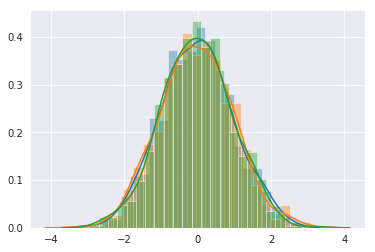

In [17]:
plot_distribution(inputs)
print_mean_std(inputs)

>>Mean: 
 tensor([-3.2336e-09, -6.8545e-09,  8.7619e-09])
>>Std: 
 tensor([1.0000, 1.0000, 1.0000])


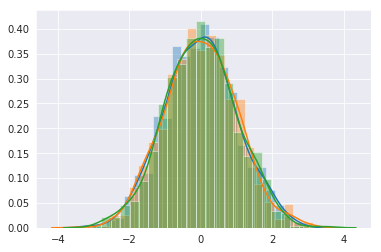

In [18]:
# stand bn by pytorch
bn_outputs = bn(inputs)
plot_distribution(bn_outputs)
print_mean_std(bn_outputs)

In [19]:
def bn_from_scratch(inputs):
    mean = torch.mean(inputs, dim=(0, 2, 3))
    mean = mean.view(1, inputs.size(1), 1, 1)
    std = torch.sqrt(torch.var(inputs, dim=(0, 2 , 3), unbiased=False) + 1e-5)
    std = std.view(1, inputs.size(1), 1, 1)
    invstd = 1/std
    test_outputs = (inputs-mean)*invstd
    return test_outputs

>>Mean: 
 tensor([-3.2336e-09, -8.7619e-09,  8.7619e-09])
>>Std: 
 tensor([1.0000, 1.0000, 1.0000])


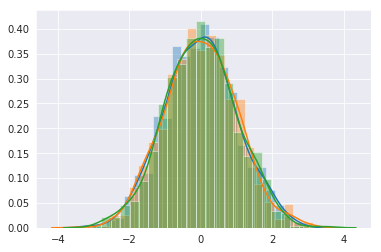

In [20]:
# bn from sratch, validate here
my_outputs = bn_from_scratch(inputs)
plot_distribution(my_outputs)
print_mean_std(my_outputs)

In [21]:
# show diff between ours and officials
torch.abs(my_outputs-bn_outputs).sum(dim=(0,2,3))
print('Max diff: ', (my_outputs - bn_outputs).abs().max())

Max diff:  tensor(5.9605e-08)
